# The task is to identify which gases are closely related to each other, **without without import any libraries!**!

I start by loading the data from a file

# Data analysis

In [1]:
with open("AirQualityUCI.csv", "r") as f:
    df = f.readlines()
    
df = [[row[:-2]] for row in df] # removal '\n' 
df = [row[0].split(';') for row in df] # separating values with a separator ';'
df[:3]

[['Date',
  'Time',
  'CO(GT)',
  'PT08.S1(CO)',
  'NMHC(GT)',
  'C6H6(GT)',
  'PT08.S2(NMHC)',
  'NOx(GT)',
  'PT08.S3(NOx)',
  'NO2(GT)',
  'PT08.S4(NO2)',
  'PT08.S5(O3)',
  'T',
  'RH',
  'AH',
  ''],
 ['10/03/2004',
  '18.00.00',
  '2,6',
  '1360',
  '150',
  '11,9',
  '1046',
  '166',
  '1056',
  '113',
  '1692',
  '1268',
  '13,6',
  '48,9',
  '0,7578',
  ''],
 ['10/03/2004',
  '19.00.00',
  '2',
  '1292',
  '112',
  '9,4',
  '955',
  '103',
  '1174',
  '92',
  '1559',
  '972',
  '13,3',
  '47,7',
  '0,7255',
  '']]

Our data has been loaded **successfully**.

As we can see the function correctly separates the values.

Additionally, the next problem is that our data is **messed up**, so I'm going to list each column as a separate **dictionary** element with their corresponding values

In [2]:
dict_col = {}
for el in df[0]:
    if len(el) > 0:
        dict_col[el] = []
dict_col

{'Date': [],
 'Time': [],
 'CO(GT)': [],
 'PT08.S1(CO)': [],
 'NMHC(GT)': [],
 'C6H6(GT)': [],
 'PT08.S2(NMHC)': [],
 'NOx(GT)': [],
 'PT08.S3(NOx)': [],
 'NO2(GT)': [],
 'PT08.S4(NO2)': [],
 'PT08.S5(O3)': [],
 'T': [],
 'RH': [],
 'AH': []}

In [3]:
for index, row in enumerate(df[1:]):
    for column, value in zip(dict_col, df[1:][index]):
        dict_col[column].append(value)
        
print("First 5 values for each column\n")
for key in dict_col:
    print(key, dict_col[key][:5])

First 5 values for each column

Date ['10/03/2004', '10/03/2004', '10/03/2004', '10/03/2004', '10/03/2004']
Time ['18.00.00', '19.00.00', '20.00.00', '21.00.00', '22.00.00']
CO(GT) ['2,6', '2', '2,2', '2,2', '1,6']
PT08.S1(CO) ['1360', '1292', '1402', '1376', '1272']
NMHC(GT) ['150', '112', '88', '80', '51']
C6H6(GT) ['11,9', '9,4', '9,0', '9,2', '6,5']
PT08.S2(NMHC) ['1046', '955', '939', '948', '836']
NOx(GT) ['166', '103', '131', '172', '131']
PT08.S3(NOx) ['1056', '1174', '1140', '1092', '1205']
NO2(GT) ['113', '92', '114', '122', '116']
PT08.S4(NO2) ['1692', '1559', '1555', '1584', '1490']
PT08.S5(O3) ['1268', '972', '1074', '1203', '1110']
T ['13,6', '13,3', '11,9', '11,0', '11,2']
RH ['48,9', '47,7', '54,0', '60,0', '59,6']
AH ['0,7578', '0,7255', '0,7502', '0,7867', '0,7888']


# Data Clean

At this point, I will list the columns that are gases and discard the columns that I do not need

In [24]:
def print_columns(column):
    print("Displaying column names in a nicer way\n")
    for i, key in enumerate(column, start=1):
        print("%-13s | %s"%(key, '\n' if i % 3 ==0 else "\t"), end='')
    print('\n'+'Number of columns: ', len(column))
    print("-"*70)

First 5 values for each gas column

In [25]:
dict_gas = {}
print_columns(dict_col)
gases = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

for gas in gases:
    dict_gas[gas] = dict_col[gas]

print_columns(dict_gas)

Displaying column names in a nicer way

Date          | 	Time          | 	CO(GT)        | 
PT08.S1(CO)   | 	NMHC(GT)      | 	C6H6(GT)      | 
PT08.S2(NMHC) | 	NOx(GT)       | 	PT08.S3(NOx)  | 
NO2(GT)       | 	PT08.S4(NO2)  | 	PT08.S5(O3)   | 
T             | 	RH            | 	AH            | 

Number of columns:  15
----------------------------------------------------------------------
Displaying column names in a nicer way

CO(GT)        | 	PT08.S1(CO)   | 	NMHC(GT)      | 
C6H6(GT)      | 	PT08.S2(NMHC) | 	NOx(GT)       | 
PT08.S3(NOx)  | 	NO2(GT)       | 	PT08.S4(NO2)  | 
PT08.S5(O3)   | 	
Number of columns:  10
----------------------------------------------------------------------


In [6]:
dict_gas.keys()

dict_keys(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'])

In [7]:
for key in dict_gas:
    print(key, dict_gas[key][:5])

CO(GT) ['2,6', '2', '2,2', '2,2', '1,6']
PT08.S1(CO) ['1360', '1292', '1402', '1376', '1272']
NMHC(GT) ['150', '112', '88', '80', '51']
C6H6(GT) ['11,9', '9,4', '9,0', '9,2', '6,5']
PT08.S2(NMHC) ['1046', '955', '939', '948', '836']
NOx(GT) ['166', '103', '131', '172', '131']
PT08.S3(NOx) ['1056', '1174', '1140', '1092', '1205']
NO2(GT) ['113', '92', '114', '122', '116']
PT08.S4(NO2) ['1692', '1559', '1555', '1584', '1490']
PT08.S5(O3) ['1268', '972', '1074', '1203', '1110']


I see that the values in the list are of the type str, so I change int to int and float to float accordingly

In [8]:
print("Before convert")
print("%-13s %s" %("Column", "Len(Column)"))
for key in dict_gas.keys():
    print("%-13s" %key, len(dict_gas[key]))

Before convert
Column        Len(Column)
CO(GT)        9471
PT08.S1(CO)   9471
NMHC(GT)      9471
C6H6(GT)      9471
PT08.S2(NMHC) 9471
NOx(GT)       9471
PT08.S3(NOx)  9471
NO2(GT)       9471
PT08.S4(NO2)  9471
PT08.S5(O3)   9471


In [9]:
int_columns = ['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)',
                            'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
                            'PT08.S5(O3)']
float_column = ['CO(GT)', 'C6H6(GT)']

In [10]:
def col_to_int(column, skipped):
    columns = []
    for i, item in enumerate(column):
        if len(item) >= 0 and item != '':
            columns.append(int(item))
        else:
            skipped.append(i) 
    return columns
    
def col_to_float(column, skipped):
    columns = []
    for i, item in enumerate(column):
        item = item.replace(',', '.')
        if len(item) >= 0 and item != '':
            columns.append(float(item))
        else:
            skipped.append(i) 
    return columns

In [11]:
skipped = []

for name in int_columns:
    dict_gas[name] = col_to_int(dict_gas[name], skipped)
    
for name in float_column:
    dict_gas[name] = col_to_float(dict_gas[name], skipped)

In [12]:
print("After convert")
print("%-13s %s" %("Column", "Len(Column)"))
for key in dict_gas.keys():
    print("%-13s" %key, len(dict_gas[key]))

After convert
Column        Len(Column)
CO(GT)        9357
PT08.S1(CO)   9357
NMHC(GT)      9357
C6H6(GT)      9357
PT08.S2(NMHC) 9357
NOx(GT)       9357
PT08.S3(NOx)  9357
NO2(GT)       9357
PT08.S4(NO2)  9357
PT08.S5(O3)   9357


As we can see some we lost some rows due to missing values

# Computing correlation between columns

Below I am going to define a few functions such as **mean**, **standard deviation**, **covariance**, **correlation** (simple linear regression) in order to use them to calculate the **relationship** between each other

In [13]:
def mean(values):
    return sum(values)/len(values)

In [14]:
def std(values, mean):
    meter = sum([(val - mean)**2 for val in values])
    denominator = len(values) - 1
    return (meter / denominator) ** (1/2)

In [15]:
def covariance(x, x_mean, y, y_mean):
    x1 = [x_val-x_mean for x_val in x]
    y1 = [y_val-y_mean for y_val in y]
    c2 = sum([x1_v * y1_v for x1_v, y1_v in zip(x1, y1)])
    val = (c2) * (1/(len(x)-1))
    return val

In [16]:
# simple linear regression
def correlation(dataset_x, dataset_y):
    cor = covariance(dataset_x, mean(dataset_x), dataset_y, mean(dataset_y))
    std_val = std(dataset_x, mean(dataset_x)) * std(dataset_y, mean(dataset_y))
    return round(cor/std_val, 2)

In [17]:
def format_col(name):
    return name.split('(')[1][:-1] if name[:1] == "P" else name.split('(')[0]

In [18]:
def print_confusion_matrix(unique, matrix):
    print('  (A)|\t' + '\t'.join(format_col(x) for x in unique))
    print('_'*84)
    print('(P)')
    for i, x in enumerate(unique):
        print("%-5s|\t%s" % (format_col(x), '\t'.join(str(x) for x in matrix[i])))
    print()

In [19]:
list_use = dict_gas.keys()
matrix = []
corr_dict = {}

for col1 in list_use:
    row = []
    for col2 in list_use:
        if col1==col2:
            row.append(1)
        else:
            cols = sorted([col1, col2])
            cor = correlation(dict_gas[col1], dict_gas[col2])
            if tuple(cols) not in corr_dict.keys():
                corr_dict[tuple(cols)] = cor
            row.append(cor)
    matrix.append(row)

print_confusion_matrix(dict_gas.keys(), matrix)

  (A)|	CO	CO	NMHC	C6H6	NMHC	NOx	NOx	NO2	NO2	O3
____________________________________________________________________________________
(P)
CO   |	1	0.04	0.13	-0.03	0.03	0.53	-0.09	0.67	-0.07	0.08
CO   |	0.04	1	0.17	0.85	0.93	0.28	0.09	0.15	0.85	0.89
NMHC |	0.13	0.17	1	0.04	0.11	-0.0	0.05	0.1	0.16	0.1
C6H6 |	-0.03	0.85	0.04	1	0.77	-0.0	0.51	-0.01	0.77	0.64
NMHC |	0.03	0.93	0.11	0.77	1	0.33	-0.07	0.18	0.87	0.91
NOx  |	0.53	0.28	-0.0	-0.0	0.33	1	-0.44	0.82	0.04	0.46
NOx  |	-0.09	0.09	0.05	0.51	-0.07	-0.44	1	-0.26	0.12	-0.21
NO2  |	0.67	0.15	0.1	-0.01	0.18	0.82	-0.26	1	-0.02	0.25
NO2  |	-0.07	0.85	0.16	0.77	0.87	0.04	0.12	-0.02	1	0.72
O3   |	0.08	0.89	0.1	0.64	0.91	0.46	-0.21	0.25	0.72	1



In [20]:
corr_dict = dict(sorted(corr_dict.items(), key=lambda item: item[1], reverse=True))
for col in corr_dict.keys():
    actual_cor = corr_dict[col]
    if actual_cor > 0.6:
        print(format_col(col[0]), end='\t')
        print(format_col(col[1]), end='\t =\t')
        print(actual_cor)

CO	NMHC	 =	0.93
NMHC	O3	 =	0.91
CO	O3	 =	0.89
NMHC	NO2	 =	0.87
C6H6	CO	 =	0.85
CO	NO2	 =	0.85
NO2	NOx	 =	0.82
C6H6	NMHC	 =	0.77
C6H6	NO2	 =	0.77
NO2	O3	 =	0.72
CO	NO2	 =	0.67
C6H6	O3	 =	0.64


As we can see a few columns are strongly related to each other, in this we can distinguish five highest correlations:
- `0.93`**(CO-NMHC)** 
- `0.91`**(NMHC-O3)** 
- `0.89`**(CO-O3)** 
- `0.87`**(NMHC-NO2)** 
- `0.85`**(C6H6-CO)** 

So we can get rid of the **CO** sensor because it has a high correlation with many other sensors like **NMHC, O3, C6H6** and measurements will also be good

# Quick check with ready-made libraries

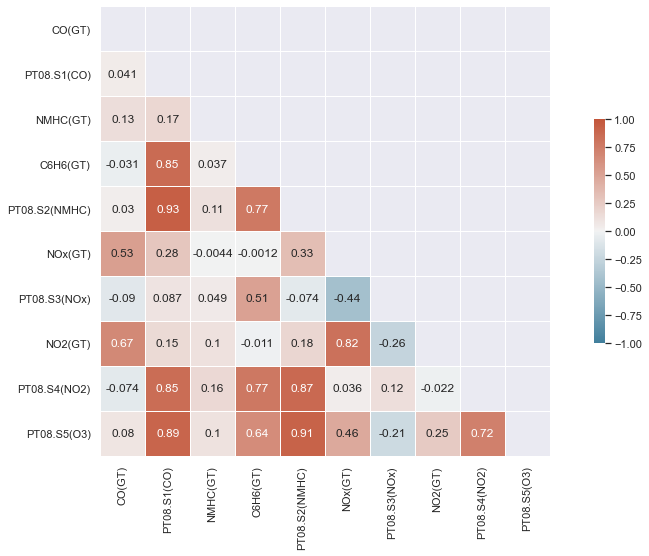

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('AirQualityUCI.csv', sep=';')
df = df[['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']]
df['T'] = df['T'].str.replace(',', '.').astype('float32')
df['RH'] = df['RH'].str.replace(',', '.').astype('float32')
df['AH'] = df['AH'].str.replace(',', '.').astype('float32')
df['CO(GT)'] = df['CO(GT)'].str.replace(',', '.').astype('float32')
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',', '.').astype('float32')
df = df.dropna()
df = df.drop(columns=['Date', 'Time', 'T', 'AH', 'RH'])

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set(rc={'figure.figsize':(15.7,8.27)})
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


Everything looks like the results of the finished library are close to mine.